In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
import skfuzzy as fuzz

In [46]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [47]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [48]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [49]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [50]:
X = base.iloc[:,[1,25]].values

In [51]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [54]:
X.shape

(30000, 2)

In [55]:
X.T.shape

(2, 30000)

In [57]:
r = fuzz.cmeans(data = X.T, c = 3, m = 2, error =0.005, maxiter=1000, init=None)

In [58]:
r

(array([[ 0.97537971, -0.42055355],
        [ 0.74968294,  2.01630341],
        [-0.73888379, -0.3017438 ]]),
 array([[0.06225431, 0.12401878, 0.01586368, ..., 0.03497363, 0.02980678,
         0.01801375],
        [0.02592766, 0.02732546, 0.00499029, ..., 0.01492014, 0.01406298,
         0.00906613],
        [0.91181803, 0.84865575, 0.97914602, ..., 0.95010623, 0.95613024,
         0.97292013]]),
 array([[0.37996775, 0.47721296, 0.36674902, ..., 0.09600922, 0.3481631 ,
         0.39419169],
        [0.29627032, 0.01223854, 0.53067811, ..., 0.64156576, 0.23396152,
         0.15134289],
        [0.32376193, 0.5105485 , 0.10257287, ..., 0.26242501, 0.41787538,
         0.45446541]]),
 array([[2.12930519, 1.36363116, 1.57274473, ..., 2.03771767, 1.70032357,
         1.90754317],
        [3.29944551, 2.90507193, 2.80412355, ..., 3.11980825, 2.47542917,
         2.68884345],
        [0.55637618, 0.52128457, 0.20018729, ..., 0.39095634, 0.30021377,
         0.25956002]]),
 array([25852.082679

In [59]:
previsoes_porcentagem = r[1]

In [60]:
previsoes_porcentagem.shape

(3, 30000)

In [61]:
previsoes_porcentagem

array([[0.06225431, 0.12401878, 0.01586368, ..., 0.03497363, 0.02980678,
        0.01801375],
       [0.02592766, 0.02732546, 0.00499029, ..., 0.01492014, 0.01406298,
        0.00906613],
       [0.91181803, 0.84865575, 0.97914602, ..., 0.95010623, 0.95613024,
        0.97292013]])

In [62]:
previsoes_porcentagem[0][0]

0.06225430761643271

In [63]:
previsoes_porcentagem[1][0]

0.025927659269868654

In [64]:
previsoes_porcentagem[2][0]

0.9118180331136986

In [65]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [72]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [73]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [74]:
previsoes[5000]

2

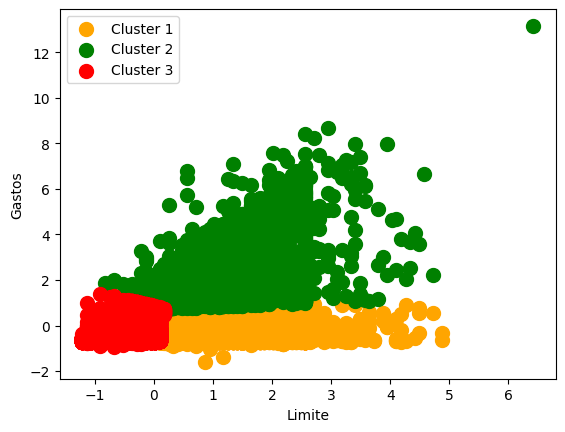

In [76]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0,1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1,1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2,1], s = 100, c = 'red', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()